In [ ]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import seaborn as sns
from google.colab import files
import io
%matplotlib inline

# xlrd is needed to load excel files
!pip install xlrd

In [ ]:
#Load data

uploaded = files.upload()


Saving Outremark5years.xls to Outremark5years (1).xls


In [ ]:
df = pd.read_excel(io.BytesIO(uploaded['Outremark5years.xls']),sheet_name='SQL Results')
df['TANGGAL'] = pd.to_datetime(df['TANGGAL'])
df.head()

,,TANGGAL,REPATROL,UNIT,WEATHER,CAUSE,LOSS,NVL(TO_CHAR(EVENT_STATUS.REMAR,"NVL(TO_CHAR(JDE_NUMBER),'')",OutageCount
0,1,2015-01-01 15:43:00,2015-01-01 15:43:00,13.8KV CENTRAL DURI FEEDER #1,Fair,Animal,0,15:43 It was reported unbalance voltage for 11...,3001248.0,1
1,2,2015-01-01 18:06:00,2015-01-01 18:06:00,13.8KV KETIGUL FEEDER#2,Cloudy,Lightning,30,Ketigul VCB fdr #2 T/R 1x.\r\nKetigul fdr #1 ...,3001248.0,1
2,3,2015-01-01 18:06:00,2015-03-01 13:06:00,13.8KV KETIGUL FEEDER#2,Cloudy,Lightning,30,"Checked & found, Ketigul VCB fdr #2 T/R 1x (...",3001248.0,1
3,4,2015-02-01 06:22:00,2015-02-01 06:22:00,NELLA SUBSTATION,Fair,Voltage regulator failure,4985,06:22 115KV Bangko-Nella line load dropped 44A...,3001248.0,1
4,5,2015-02-01 06:31:00,2015-02-01 06:31:00,13.8KV NORTH DURI FEEDER #1,Fair,Unidentified,0,No.Duri VCB fdr #1 T/R 1x.\r\nNot checked yet...,3001248.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14911 entries, 0 to 14910
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0                                   14911 non-null  int64         
 1   TANGGAL                         14911 non-null  datetime64[ns]
 2   REPATROL                        14911 non-null  object        
 3   UNIT                            14911 non-null  object        
 4   WEATHER                         13581 non-null  object        
 5   CAUSE                           13516 non-null  object        
 6   LOSS                            14911 non-null  object        
 7   NVL(TO_CHAR(EVENT_STATUS.REMAR  14911 non-null  object        
 8   NVL(TO_CHAR(JDE_NUMBER),'')     4671 non-null   float64       
 9   OutageCount                     14911 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 1.

In [ ]:
missing_data = df.isnull()
missing_data.head()

,,TANGGAL,REPATROL,UNIT,WEATHER,CAUSE,LOSS,NVL(TO_CHAR(EVENT_STATUS.REMAR,"NVL(TO_CHAR(JDE_NUMBER),'')"
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [ ]:
mask_data = df.isnull().any(axis=1)
df[mask_data].head()

,,TANGGAL,REPATROL,UNIT,WEATHER,CAUSE,LOSS,NVL(TO_CHAR(EVENT_STATUS.REMAR,"NVL(TO_CHAR(JDE_NUMBER),'')"
17,18,05-01-2015 23:59,05-01-2015 23:59,CPI POWER SYSTEM,Fair,Normal Condition,-,CPI Power system normal Condition.\r\n\r\n,NaN
31,32,07-01-2015 12:58,07-01-2015 12:58,MINAS POWER PLANT,Fair,NaN,-,MGT #5 T/O By Alarm: High vibration trip.\r\n...,NaN
32,33,07-01-2015 14:05,07-01-2015 14:05,MINAS POWER PLANT,NaN,NaN,-,"14:05 S/U MGT #5 , then On Line at 14:55.\r\n\r\n",NaN
48,49,08-01-2015 18:00,08-01-2015 18:00,MINAS POWER PLANT,NaN,NaN,-,"18:00 Off line MGT #10, then S/D the Unit at 1...",123.0
49,50,08-01-2015 18:20,08-01-2015 18:20,MINAS POWER PLANT,NaN,NaN,-,"18:20 S/U MGT #6, then on line the unit at 18:...",NaN


In [ ]:
missing_data.sum()

                                      0
TANGGAL                               0
REPATROL                              0
UNIT                                  0
WEATHER                            1330
CAUSE                              1395
LOSS                                  0
NVL(TO_CHAR(EVENT_STATUS.REMAR        0
NVL(TO_CHAR(JDE_NUMBER),'')       10240
dtype: int64

In [ ]:
#change missing value with median
df.fillna(value=0,inplace=True)

In [ ]:
df.describe()

,Production Light 1 (BOPD),Production Light 2 (BOPD),Production Heavy (BOPD),Production Oil (BOPD),Estimate Produced Water (BWPD),Heat Rate (MSCF/MWHR),Import Gas (MSCFD),Own Gas (MSCFD),Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg
count,344.000000,344.000000,344.000000,344.000000,3.440000e+02,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,64794.299419,47302.712209,65187.584302,177284.595930,1.772846e+08,17.340879,32.787592,20.810377,23.104360,32.417151,26.952907,84.409884,291.466570,4.423547,2.331395,0.601744
std,4619.983634,2075.039250,4060.997820,7831.410407,7.831410e+06,0.984722,10.146096,3.119916,0.544368,1.353334,0.760729,3.398339,1564.754671,2.389090,1.513998,0.567432
min,42730.000000,33331.000000,43512.000000,151991.000000,1.519910e+08,14.653374,20.373899,6.532344,21.400000,26.000000,24.100000,75.000000,0.000000,0.000000,0.000000,0.000000
25%,62840.500000,46250.250000,61961.500000,172011.500000,1.720115e+08,16.652638,26.974625,19.222382,23.000000,31.800000,26.600000,82.000000,0.000000,2.775000,2.000000,0.000000
50%,64509.500000,47339.000000,65668.000000,177045.000000,1.770450e+08,17.314424,29.259700,20.963706,23.000000,32.400000,27.000000,84.000000,3.000000,4.500000,2.000000,1.000000
75%,66642.250000,48382.250000,68390.000000,182405.750000,1.824058e+08,18.030769,33.490474,22.861856,23.400000,33.200000,27.400000,86.000000,7.850000,6.025000,3.000000,1.000000
max,84126.000000,63484.000000,77359.000000,213471.000000,2.134710e+08,20.445555,61.537941,27.296082,25.200000,40.000000,30.000000,96.000000,8888.000000,10.400000,21.000000,2.000000


In [ ]:
print(df.nunique())

Date                              344
Production Light 1 (BOPD)         332
Production Light 2 (BOPD)         332
Production Heavy (BOPD)           341
Production Oil (BOPD)             341
Estimate Produced Water (BWPD)    341
Heat Rate (MSCF/MWHR)             344
Import Gas (MSCFD)                344
Own Gas (MSCFD)                   344
Tn                                 27
Tx                                 61
Tavg                               42
RH_avg                             22
RR                                 90
ss                                 91
ff_x                                8
ff_avg                              3
Outage                              1
dtype: int64


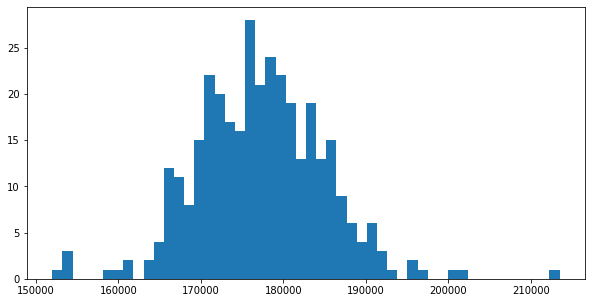

In [ ]:
A = df.columns[4]
data = df[A]
density = stat.gaussian_kde(data)
plt.figure(figsize = (10,5))
plt.hist(data, bins=50)
plt.show()

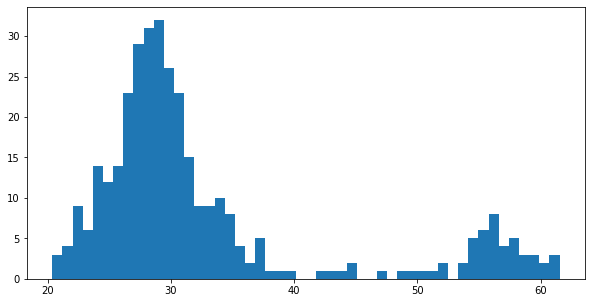

In [ ]:
B = df.columns[7]
data2 = df[B]
density2 = stat.gaussian_kde(data2)
plt.figure(figsize = (10,5))
plt.hist(data2, bins=50)
plt.show()

Text(0.5, 1.0, 'Production Trends')

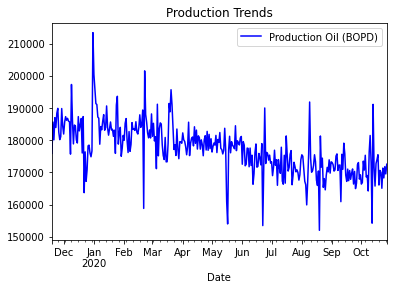

In [ ]:
df.plot(x='Date',y='Production Oil (BOPD)', style='blue')
plt.title('Production Trends')

Text(0.5, 1.0, 'Fuel Trends')

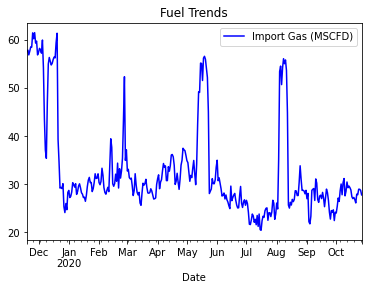

In [ ]:
df.plot(x='Date',y='Import Gas (MSCFD)', style='blue')
plt.title('Fuel Trends')

(0.0, 63.59902407440837)

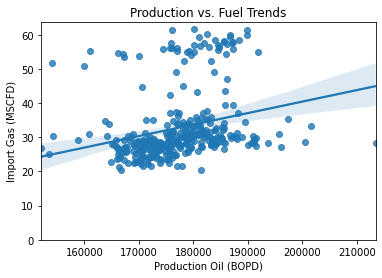

In [ ]:
sns.regplot(x="Production Oil (BOPD)",y="Import Gas (MSCFD)", data=df)
plt.title('Production vs. Fuel Trends')
plt.ylim(0,)

In [ ]:
#Data Scaling
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
df_new = df.copy()
scaler.fit(df_new[df_new.columns[1:]])
df_new[df_new.columns[1:]] = scaler.transform(df_new[df_new.columns[1:]])
df_new.head()

,Date,Production Light 1 (BOPD),Production Light 2 (BOPD),Production Heavy (BOPD),Production Oil (BOPD),Estimate Produced Water (BWPD),Heat Rate (MSCF/MWHR),Import Gas (MSCFD),Own Gas (MSCFD),Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg,Outage
0,2019-11-19,0.499034,0.332969,0.758029,0.389346,0.389346,0.248808,0.904841,0.657679,0.684211,0.357143,0.338983,0.571429,0.002183,0.586538,0.095238,0.0,0.0
1,2019-11-20,0.618755,0.428714,0.813839,0.547642,0.547642,0.249225,0.911852,0.693446,0.421053,0.257143,0.254237,0.761905,0.000506,0.259615,0.000000,0.0,0.0
2,2019-11-21,0.515968,0.455411,0.752327,0.457661,0.457661,0.253610,0.887409,0.766420,0.421053,0.428571,0.322034,0.523810,0.000585,0.048077,0.142857,0.5,0.0
3,2019-11-22,0.601942,0.471628,0.836322,0.569746,0.569746,0.264841,0.906095,0.764696,0.421053,0.500000,0.305085,0.571429,0.000113,0.346154,0.142857,0.5,0.0
4,2019-11-23,0.549039,0.489669,0.794694,0.520055,0.520055,0.267020,0.928103,0.728033,0.421053,0.342857,0.254237,0.619048,0.001856,0.403846,0.095238,0.5,0.0


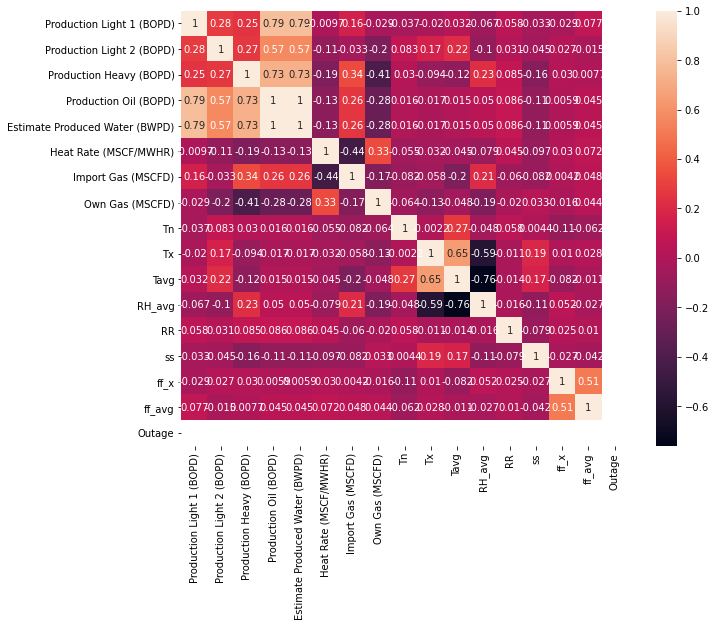

In [ ]:
#Explore the correlation between parameters
f, ax = plt.subplots(figsize=(10, 8))
corr = df_new.corr()
sns.heatmap(corr, annot=True)

In [ ]:
uploaded2 = files.upload()

Saving Dummy Outage.xlsx to Dummy Outage (2).xlsx


In [ ]:
df1 = pd.read_excel(io.BytesIO(uploaded2['Dummy Outage.xlsx']))
print('Shape of the dataset:', df1.shape)
df1.head(10)

Shape of the dataset: (2208, 18)


,No.,Outage,Outage Month,Outage Hour,Outage Timing,Outage Day,Outage Days,Outage Date,Year,Re/Patrol,Feeder / Unit,Area,Ops Area,Weather,Cause,Loss,R E M A R K,OutageCount
0,1,2020-01-10 07:25:00,January,07:25:00,Morning,Friday,Weekdays,10,2020,2020-01-10 07:25:00,MINAS POWER PLANT,Minas,PGT South,NaN,NaN,-,"07:25 MGT#5 trip, by alarm Bus Under voltage. ...",1
1,2,2020-01-10 07:25:00,January,07:25:00,Morning,Friday,Weekdays,10,2020,2020-01-10 07:25:00,13.8KV MINAS FEEDER #6,Minas,PGT South,Lightning,Animal,75,07:25 Minas ACB fdr#6 T/LO Ctr:207-209 R/F:51@...,1
2,3,2020-01-10 13:30:00,January,13:30:00,Afternoon,Friday,Weekdays,10,2020,2020-01-10 13:30:00,13.8KV 4D FEEDER #3,Minas,PGT South,Rain,Unidentified,-,4D fdr#3 T/R 1x Ctr:307-308 R/F:51@2@3. Not ch...,1
3,NaN,2020-01-10 13:30:00,January,13:30:00,Afternoon,Friday,Weekdays,10,2020,2020-05-10 17:03:00,13.8KV 4D FEEDER #3,Minas,PGT South,Rain,Unidentified,-,Checked And Found 4DSB OCB3 Fdr #8 Ctr 307-308...,1
4,4,2020-01-10 14:00:00,January,14:00:00,Afternoon,Friday,Weekdays,10,2020,2020-01-10 14:00:00,13.8KV DURI COMMUNITY FEEDER #3,Duri,PGT North,Rain and Lightning,Lightning Arrester,-,Duri Community ACB fdr#3 T/R 1x. Not checked y...,1
5,NaN,2020-01-10 14:00:00,January,14:00:00,Afternoon,Friday,Weekdays,10,2020,2020-05-10 08:00:00,13.8KV DURI COMMUNITY FEEDER #3,Duri,PGT North,Rain and Lightning,Lightning Arrester,-,Checked & found Duri Community fdr#3 T/R 1x Ct...,1
6,5,2020-01-10 15:44:00,January,15:44:00,Afternoon,Friday,Weekdays,10,2020,2020-01-10 15:44:00,13.8KV DARLING VCB FEEDER #4,Duri,PGT North,Rain and Lightning,Circuit Breaker,7,15:44 Darling VCB fdr#4 T/LO Ctr:151-154 R/F:5...,1
7,6,2020-02-10 08:41:00,February,08:41:00,Morning,Monday,Weekdays,10,2020,2020-02-10 08:41:00,13.8KV KETIGUL FEEDER#1,Bangko-Balam,PGT North,Fair,Dead End Insulator,22,Ketigul fdr#1 T/R 1x. Not checked yet.,1
8,NaN,2020-02-10 08:41:00,February,08:41:00,Morning,Monday,Weekdays,10,2020,2020-05-10 15:16:00,13.8KV KETIGUL FEEDER#1,Bangko-Balam,PGT North,Fair,Dead End Insulator,22,Checked And Found PKTGL VCB1 Fdr #8 Ctr 243-24...,1
9,7,2020-02-10 10:40:00,February,10:40:00,Morning,Monday,Weekdays,10,2020,2020-02-10 10:40:00,CENTRAL DURI POWER PLANT,Duri,PGT North,NaN,NaN,-,"S/U CGT#5, then on line the unit at 11:06.",1


In [ ]:
datetime_rowid = df['TANGGAL'].map(lambda t: pd.to_datetime(t,
format='%Y-%m-%d %H:%M:%S'))
df.index = datetime_rowid
df.head(10)

,,TANGGAL,REPATROL,UNIT,WEATHER,CAUSE,LOSS,NVL(TO_CHAR(EVENT_STATUS.REMAR,"NVL(TO_CHAR(JDE_NUMBER),'')",OutageCount
TANGGAL,,,,,,,,,,
2015-01-01 15:43:00,1,2015-01-01 15:43:00,2015-01-01 15:43:00,13.8KV CENTRAL DURI FEEDER #1,Fair,Animal,0,15:43 It was reported unbalance voltage for 11...,3001248.0,1
2015-01-01 18:06:00,2,2015-01-01 18:06:00,2015-01-01 18:06:00,13.8KV KETIGUL FEEDER#2,Cloudy,Lightning,30,Ketigul VCB fdr #2 T/R 1x.\r\nKetigul fdr #1 ...,3001248.0,1
2015-01-01 18:06:00,3,2015-01-01 18:06:00,2015-03-01 13:06:00,13.8KV KETIGUL FEEDER#2,Cloudy,Lightning,30,"Checked & found, Ketigul VCB fdr #2 T/R 1x (...",3001248.0,1
2015-02-01 06:22:00,4,2015-02-01 06:22:00,2015-02-01 06:22:00,NELLA SUBSTATION,Fair,Voltage regulator failure,4985,06:22 115KV Bangko-Nella line load dropped 44A...,3001248.0,1
2015-02-01 06:31:00,5,2015-02-01 06:31:00,2015-02-01 06:31:00,13.8KV NORTH DURI FEEDER #1,Fair,Unidentified,0,No.Duri VCB fdr #1 T/R 1x.\r\nNot checked yet...,3001248.0,1
2015-02-01 06:31:00,6,2015-02-01 06:31:00,2015-06-01 08:31:00,13.8KV NORTH DURI FEEDER #1,Fair,Unidentified,0,"Checked & found, No.Duri VCB fdr #1 T/R 1x ...",3001248.0,1
2015-02-01 07:00:00,7,2015-02-01 07:00:00,2015-02-01 07:00:00,13.8KV CENTRAL DURI FEEDER #2,Fair,Secondary Cable,130,07:00 It was reported b/o fuses for Tx o/p #08...,3001248.0,1
2015-03-01 06:30:00,8,2015-03-01 06:30:00,2015-03-01 06:30:00,13.8KV DURI FIELD FEEDER #4,Fair,Guy Wire,4,06:30 It was reported b/o fuses for Tx o/p #06...,3001248.0,1
2015-03-01 08:37:00,9,2015-03-01 08:37:00,2015-03-01 08:37:00,13.8KV ROKAN FEEDER #2,Cloudy and Lightning,Lightning,0,Rokan VCB fdr #2 T/R 1x.\r\nNot checked yet.\...,3001248.0,1


In [ ]:
df['Month_Year'] = df.index.map(lambda d: d.strftime('%m-%Y'))

In [ ]:
monthly_stats = df.groupby(by='Month_Year')['OutageCount'].aggregate([np.count_nonzero, np.mean, np.median,
np.std])
monthly_stats.reset_index(inplace=True)
monthly_stats.head(10)

,Month_Year,count_nonzero,mean,median,std
0,01-2015,166,1,1,0.0
1,01-2016,232,1,1,0.0
2,01-2017,186,1,1,0.0
3,01-2018,199,1,1,0.0
4,01-2019,132,1,1,0.0
5,01-2020,169,1,1,0.0
6,01-2021,11,1,1,0.0
7,02-2015,157,1,1,0.0
8,02-2016,185,1,1,0.0
9,02-2017,234,1,1,0.0


In [ ]:
monthly_stats['Year'] = monthly_stats['Month_Year']\
 .map(lambda m: pd.to_datetime(m,format='%m-%Y').strftime('%Y'))
monthly_stats['Month'] = monthly_stats['Month_Year']\
 .map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%m'))
monthly_stats.sort_values(by=['Year', 'Month'], inplace=True)
monthly_stats.head(10)

,Month_Year,count_nonzero,mean,median,std,Year,Month
0,01-2015,166,1,1,0.0,2015,01
7,02-2015,157,1,1,0.0,2015,02
14,03-2015,240,1,1,0.0,2015,03
21,04-2015,224,1,1,0.0,2015,04
28,05-2015,189,1,1,0.0,2015,05
34,06-2015,169,1,1,0.0,2015,06
40,07-2015,196,1,1,0.0,2015,07
46,08-2015,202,1,1,0.0,2015,08
52,09-2015,165,1,1,0.0,2015,09
58,10-2015,185,1,1,0.0,2015,10


In [ ]:
#Let's set the Month_Year as the row index
monthly_stats.index = monthly_stats['Month_Year']

Text(0.5, 1.0, 'Outage Trending by Month')

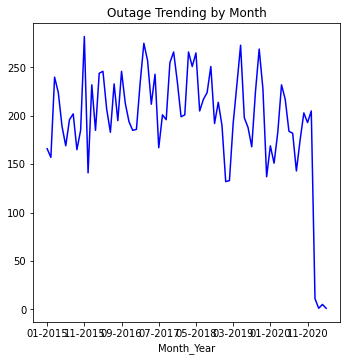

In [ ]:
#Plot original time series and daily mean
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

monthly_stats['count_nonzero'].plot(ax=ax, color='b')

ax.set_title('Outage Trending by Month')

In [ ]:
# evaluate cnn
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_log_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from matplotlib import pyplot

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values

# root mean squared error or rmse
def measure_rmsle(actual, predicted):
	return sqrt(mean_squared_log_error(actual, predicted))

# fit a model
def model_fit(train, config):
	# unpack config
	n_input, n_filters, n_kernel, n_epochs, n_batch = config
	# prepare data
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
	# define model
	model = Sequential()
	model.add(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu', input_shape=(n_input, 1)))
	model.add(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu'))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# fit
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model

# forecast with a pre-fit model
def model_predict(model, history, config):
	# unpack config
	n_input, _, _, _, _ = config
	# prepare data
	x_input = array(history[-n_input:]).reshape((1, n_input, 1))
	# forecast
	yhat = model.predict(x_input, verbose=0)
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# fit model
	model = model_fit(train, cfg)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = model_predict(model, history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmsle(test, predictions)
	print(' > %.3f' % error)
	return error

# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	return scores

# summarize model performance
def summarize_scores(name, scores):
	# print a summary
	scores_m, score_std = mean(scores), std(scores)
	print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
	# box and whisker plot
	pyplot.boxplot(scores)
	pyplot.show()

In [ ]:
series = monthly_stats.iloc[:,1]
data = series.values
data

array([166, 157, 240, 224, 189, 169, 196, 202, 165, 185, 282, 141, 232,
       185, 244, 246, 207, 183, 233, 195, 246, 213, 194, 185, 186, 234,
       275, 257, 212, 243, 167, 201, 196, 255, 266, 235, 199, 201, 266,
       251, 265, 205, 217, 224, 251, 192, 214, 190, 132, 133, 192, 232,
       273, 198, 188, 168, 225, 269, 228, 137, 169, 151, 183, 232, 217,
       184, 182, 143, 175, 203, 193, 205,  11,   1,   5,   1])

 > 2.169
 > 2.206
 > 2.201
 > 2.170
 > 2.162
 > 2.187
 > 2.155
 > 2.207
 > 2.215
 > 2.176
 > 2.151
 > 2.144
 > 2.177
 > 2.174
 > 2.183
 > 2.174
 > 2.214
 > 2.204
 > 2.167
 > 2.204
 > 2.185
 > 2.176
 > 2.178
 > 2.199
 > 2.169
 > 2.179
 > 2.188
 > 2.157
 > 2.207
 > 2.160
cnn: 2.181 RMSE (+/- 0.019)


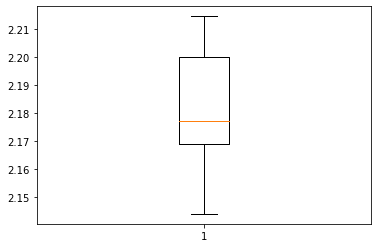

In [ ]:
# data split
n_test = 12
# define config
config = [36, 256, 3, 100, 100]
# grid search
scores = repeat_evaluate(data, config, n_test)
# summarize scores
summarize_scores('cnn', scores)